# Vocabulary visualizations per region

In [1]:
using Pkg
Pkg.activate(".")

using Plots, StatsBase, CSV, DataFrames, LinearAlgebra, TextSearch, Formatting, Latexify,
    SimilaritySearch, SimSearchManifoldLearning

  Activating project at `~/Research/RegionalSpanish/notebooks`


In [2]:
DATA = "../data/SpanishLang/"
CSV.read(joinpath(DATA, "voc-stats.tsv.gz"), DataFrame, delim='\t')

Row,country_code,n,rawvoc,voc
,String3,Int64,Int64,Int64
1,AR,129774176,3302464,669745
2,BO,487696,156017,46655
3,BR,3823792,594117,125785
4,CA,755740,235676,62645
5,CL,22364784,1252438,281290
6,CO,32709838,1444233,322982
7,CR,3811036,339908,102446
8,CU,106966,70257,18496
9,DO,3157663,387205,108063


In [3]:
V = CSV.read(joinpath(DATA, "voc.tsv.gz"), DataFrame, delim='\t')
@info names(V)
cclist = unique(V.country_code)
sort!(cclist)
@info cclist

┌ Info: ["token", "country_code", "ndocs", "idf"]
└ @ Main In[3]:2
┌ Info: String3[String3("ALL"), String3("AR"), String3("BO"), String3("BR"), String3("CA"), String3("CL"), String3("CO"), String3("CR"), String3("CU"), String3("DO"), String3("EC"), String3("ES"), String3("FR"), String3("GB"), String3("GQ"), String3("GT"), String3("HN"), String3("MX"), String3("NI"), String3("PA"), String3("PE"), String3("PR"), String3("PY"), String3("SV"), String3("US"), String3("UY"), String3("VE")]
└ @ Main In[3]:5


In [23]:
voclist = Dict{String,Dict{UInt64,Float64}}()
vocfreq = Dict()
for g in groupby(V, :country_code)
    D = Dict{UInt64,Float64}()
    F = Dict{String,Int}()
    cc = g.country_code[1]
    voclist[cc] = D
    vocfreq[cc] = F
    for row in eachrow(g)
        D[hash(row.token)] = row.idf
        F[row.token] = row.ndocs
    end

    #normalize!(D)
end


# top-20 most popular tokens by region

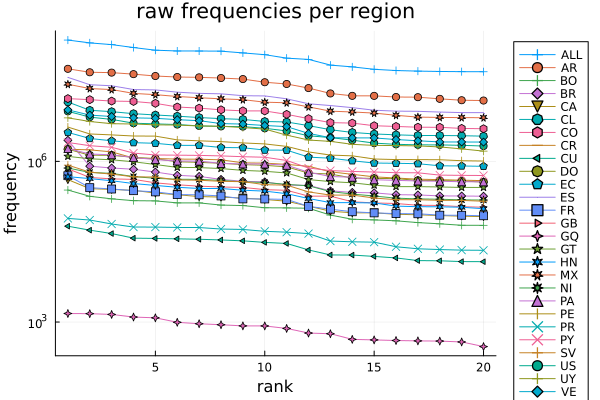

| region |    1 |    2 |     3 |    4 |   5 |   6 |     7 |   8 |   9 |  10 |  11 |    12 |    13 |  14 |    15 |    16 |  17 |    18 |    19 |   20 |
| ------:| ----:| ----:| -----:| ----:| ---:| ---:| -----:| ---:| ---:| ---:| ---:| -----:| -----:| ---:| -----:| -----:| ---:| -----:| -----:| ----:|
|    ALL | _usr |  que |    de |    , |   y |   a |     . |  la |  no |  el |  en |    me |    es |  se |    lo |    un | con |     0 |   los |  por |
|     AR |  que | _usr |    de |    , |   a |   y |    la |  no |  me |  el |   . |    en |    se |  lo |    es |    un | con |    mi |     0 |   te |
|     BO | _usr |   de |   que |    . |   , |  la |     y |  el |   a |  en |  no | _htag |    es | los |    se |   por |  un |     0 |   con |   lo |
|     BR | _usr |   de |     , |  que |   a |  no | _htag |   . |  me |   0 |  la |     y |    el |  en |    te |     ! | por |     o |    se |    ? |
|     CA | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    se | los |    me |    lo |  un |   por |     0 |  con |
|     CL | _usr |   de |   que |    , |  la |   y |     . |   a |  el |  no |  en | _htag |    es |  se |   los |    me |  un |    .. |   con |  por |
|     CO | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    me |  se |   por |    lo | los |   con | _htag |   un |
|     CR | _usr |  que |    de |    , |   y |   . |     a |  la |  no |  el |  en |    me |    es |  se |    un |     0 |  lo |   con |   por |   mi |
|     CU | _usr |   de | _htag |   la |   , |  en |     . |   y | que |  el |   a |    no |    es | los |     0 |   por |  se |    un |   con | para |
|     DO | _usr |  que |    de |    . |   , |   y |    la |  el |   a |  en |  no |    es | _htag |  se |   los |     0 | por |    un |    lo |  con |
|     EC | _usr |   de |   que |    . |   , |  la |     y |   a |  el |  en |  no |    es | _htag |  se |   los |     0 | por |   con |    lo |   un |
|     ES | _usr |  que |    de |    , |   . |   y |     a |  la |  no |  el |  en |    es |    me |  lo |    se |    un |   0 |   por | _htag |  los |
|     FR | _usr |   de |   que |    . |   , |   y |    la |   a |  no |  en |  el |    es |    me |  un |     0 |    se |  lo |   los | _htag |  por |
|     GB | _usr |  que |    de |    . |   , |   y |     a |  la |  no |  el |  en |    me |    es |  lo |    un |    se |   0 |   por |   los |  con |
|     GQ | _usr |    . |   que |   de |   , |  la |     a |  el |  no |   y |  en | _htag |    es | los |    lo |   por |  un |    se |    me |    ? |
|     GT | _usr |  que |    de |    . |   , |   y |    la |   a |  no |  el |  en |    es |    me |  se | _htag |    lo | por |    .. |   los |    0 |
|     HN | _usr |  que |    de |    . |   , |   y |    la |   a |  el |  no |  en |    es | _htag |  me |    se |     0 |  lo |   por |   los |  con |
|     MX | _usr |  que |    de |    , |   . |   y |     a |  la |  no |  el |  en |    me | _htag |  es |    se |   por |  mi |    un |   con |    0 |
|     NI |  que |   de |  _usr |    , |   a |   y |    la |  no |   . |  me |  el |    en |    es |  se |    mi | _htag |  lo |     0 |   por |  con |
|     PA | _usr |   de |   que |    . |   y |  la |     , |   a |  el |  no |  en |    es |    se | los |    me |    lo |   0 |   por |   con |   un |
|     PE | _usr |   de |   que |    , |   . |   y |    la |   a |  no |  el |  en |    es | _htag |  se |    me |   los | por |    lo |   con |    0 |
|     PR | _usr |  que |    de |    . |   y |   a |     , |  la |  no |  en |  el |    me |    es |   0 |    se |    lo |  yo |   con |   los |   un |
|     PY | _usr |  que |    de |    , |   a |   y |    la |   . |  no |  el |  en |    es |    se |  me | _htag |   por |   0 |    un |    lo |  con |
|     SV | _usr |   de |   que |    , |   . |  la |     y |  el |   a |  no |  en |    es |   los |  se |   por |     0 |  lo | _htag |   con |   un |
|     US | _usr |  que |    de |    . |   y |   , |     a |  la |  no |  el |  en |    me |    es |  se |    lo |   los |  un |   por |     0 |  con |
|     UY |  que |   de |     , | _usr |   y |   a |    la |  no |  me |  el |  en |     . |    se |  es |    lo |    un | con |     0 |   los | jaja |
|     VE | _usr |   de |   que |    . |   , |   y |    la |   a |  el |  no |  en |    es |    se | los |     0 | _htag | por |   con |    lo |   me |


In [5]:
k = 20
display("text/markdown", """# top-$k most popular tokens by region""")
plot()
table = Matrix{String}(undef, length(cclist) + 1, k+1)
header = ["region"]
for i in 1:k
    push!(header, string(i))
end

table[1, :] .= header
for (i, cc) in enumerate(cclist)
    voc = collect(vocfreq[cc])
    sort!(voc, by=p -> p[end], rev=true)
    resize!(voc, k)
    # display("text/markdown", "$cc: " * join(first.(voc), ", "))
    table[i+1, 1] = cc
    table[i+1, 2:end] .= first.(voc)
    plot!(last.(voc), label=cc, m=:auto)
    #display("text/markdown", "    freqs: " * join(format.(Int.(last.(voc)), autoscale=:metric, precision=1), ", "))
end
# display(latexify(table))

plot!(title="raw frequencies per region", yscale=:log10, ylabel="frequency", xlabel="rank", legend=:outertopright, fmt=:png) |> display
display("text/markdown", latexify(table, latex=false, env=:mdtable))

In [24]:
n = length(cclist)
A = Matrix{Float64}(undef, n, n)

dist = CosineDistance()
@time for (i, cc) in enumerate(cclist)
    u = voclist[cc]
    A[i, i] = 0.0
    for j in i+1:n
        v = voclist[cclist[j]]
        A[j, i] = A[i, j] = evaluate(dist, u, v)        
    end
end

  2.465883 seconds (16.01 k allocations: 763.344 KiB, 0.72% compilation time)


In [25]:
function creatergb!(C)
    for i in (1, 2, 3)
        v = @view C[i, :]
        #s = 4 * std(v)
        min_, max_ = extrema(v)
        #v .= v ./ s .+ 0.5

        for j in eachindex(v)
            x = (v[j] - min_) / (max_ - min_)
            #x = v[j]
            v[j] = clamp(x, 0, 0.95)
        end
    end

    [RGB(c...) for c in eachcol(C)]
end

creatergb! (generic function with 1 method)

  0.000159 seconds (3 allocations: 1.062 KiB)


┌ Info: ======= k=4 =====
└ @ Main In[28]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.0803e-5
- embedding init: 0.000652479
- embedding opt: 0.001899394



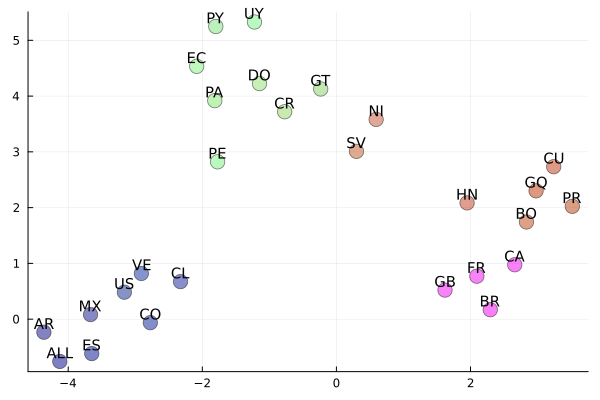

  0.000185 seconds (3 allocations: 1.531 KiB)


┌ Info: ======= k=6 =====
└ @ Main In[28]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 4.3283e-5
- embedding init: 0.000482436
- embedding opt: 0.00592783



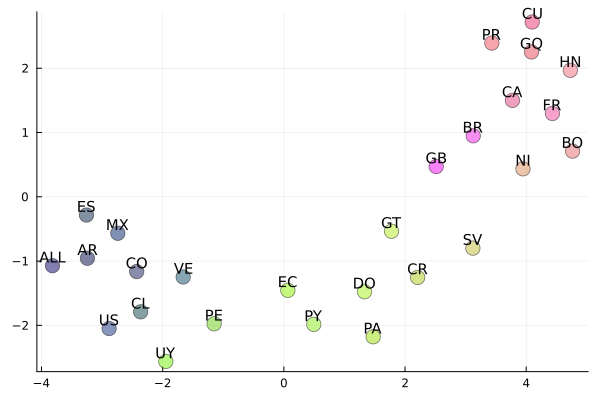

  0.000174 seconds (3 allocations: 2.062 KiB)


┌ Info: ======= k=8 =====
└ @ Main In[28]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 7.3556e-5
- embedding init: 0.000417164
- embedding opt: 0.007237136



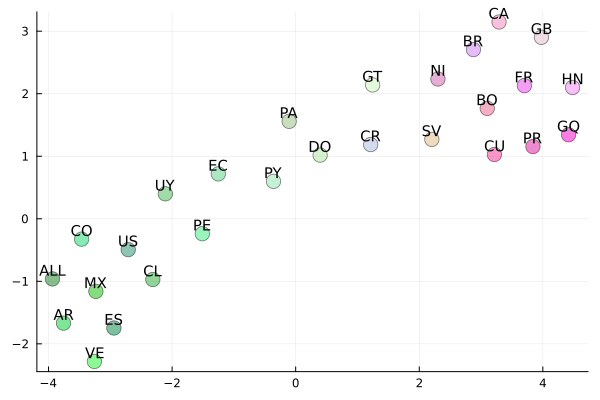

  0.000215 seconds (3 allocations: 2.375 KiB)


┌ Info: ======= k=10 =====
└ @ Main In[28]:9
*** computing graph
*** layout embedding SpectralLayout
*** fit ab / embedding
*** opt embedding
UMAP construction time cost report:
- fuzzy graph: 6.1872e-5
- embedding init: 0.000419205
- embedding opt: 0.007818745



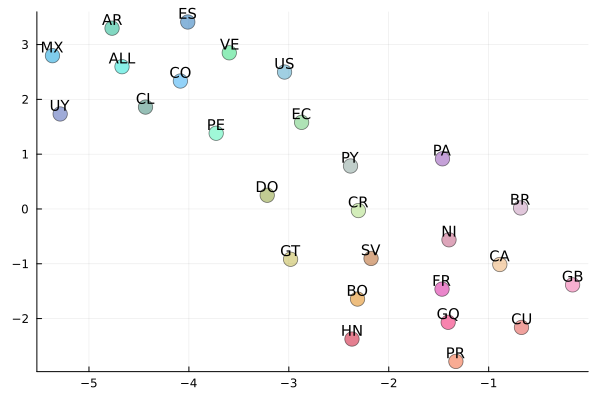

In [28]:
min_dist = 0.1
neg_sample_rate = 5
local_connectivity = 1
n_epochs = 300
layout = SpectralLayout()
tol = 1e-5

for k in 4:2:10
    @info "======= k=$k ====="
    #I = ExhaustiveSearch(db=MatrixDatabase(A), dist=L2Distance())
    I = PrecomputedAffinityMatrix(A)
    E = fit(UMAP, I; maxoutdim=3, k, min_dist, layout, n_epochs, neg_sample_rate, local_connectivity)
    C = creatergb!(predict(E))
    X = predict(fit(E, 2))
    
    scatter(X[1, :], X[2, :], c=C, label="", series_annotations=text.(cclist, :bottom, 10), ms=8, ma=0.5, la=0.5, alpha=0.5)
    savefig("../figs/fig-voc-lexical-umap-$k.pdf")
    savefig("../figs/fig-voc-lexical-umap-$k.png")
    plot!(fmt=:png) |> display
    
    open(joinpath(DATA, "colormap-common-voc-lexical-$k.csv"), "w") do f
        println(f, "country,R,G,B")
        for (i, (cc, c)) in enumerate(zip(cclist, C))
            println(f, cc, ",", c.r, ",", c.g, ",", c.b)
        end
    end
end


# Spanish language vocabulary visualization (UMAP) per region

2d and 3d projections, for spatial distribution and 3d to color distributions, respectively.
It computes UMAP using 3NN and cosine distance with raw vocabularies/emojis.



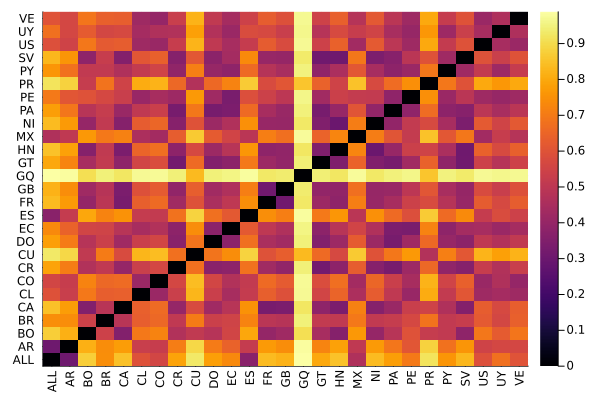

In [14]:
heatmap(cclist, cclist, A, ticks = :all, xrot=90)
savefig("../figs/fig-common-words-lexical-affinity-matrix.pdf")
savefig("../figs/fig-common-words-lexical-affinity-matrix.png")
plot!(fmt=:png)